### Import Packages

In [1]:
#Import Pacakges
import pandas as pd

import graph_tool.all as gt
import pickle
import numpy as np
import pylab as plt
import seaborn as sns
from sbmtm import sbmtm

### Import & Process Data

In [2]:
filtered_data = pd.read_excel('ekko_Data_MSc.xlsx')

df = filtered_data 

# Create a dictionary to store MCC lists for each customer
customer_mcc_dict = {}

# Iterate through the dataframe
for _, row in df.iterrows():
    customer_id = row['customerId']
    mcc = row['MCC_List']

    # Check if the customer_id is already in the dictionary
    if customer_id in customer_mcc_dict:
        customer_mcc_dict[customer_id].append(mcc)
    else:
        customer_mcc_dict[customer_id] = [mcc]

In [3]:
filtered_data = pd.read_excel('ekko_Data_MSc.xlsx')

df = filtered_data 

# Create a dictionary to store MCC lists for each customer
customer_mcc_dict = {}

# Iterate through the dataframe
for _, row in df.iterrows():
    customer_id = row['customerId']
    mcc = row['MCC_List']
    if mcc != 'Not_Found':
    # Check if the customer_id is already in the dictionary
        if customer_id in customer_mcc_dict:
            customer_mcc_dict[customer_id].append(mcc)
        else:
            customer_mcc_dict[customer_id] = [mcc]

In [4]:
customer_mcc_dict


{'0621273e-3816-422f-a7ef-69cdea6f741d': [nan],
 '886926ad-2f76-4746-a7fc-ca1473c848a3': ['Computer Software Stores',
  'Large Digital Goods Merchant  ',
  'Computer Software Stores',
  'Professional Services - Not Elsewhere Classified',
  'Computer Software Stores',
  'Professional Services - Not Elsewhere Classified',
  'Large Digital Goods Merchant  ',
  'Large Digital Goods Merchant  ',
  'Large Digital Goods Merchant  ',
  'Large Digital Goods Merchant  ',
  'Ryan Air - RYANAIR',
  'Utilities-Electric, Gas, Water, and Sanitary',
  'Professional Services - Not Elsewhere Classified',
  'Charitable and Social Service Organizations',
  'Passenger Rail (train)',
  'Miscellaneous Food Stores-Convenience Stores and Specialty Markets',
  'Grocery Stores and Supermarkets',
  'Grocery Stores and Supermarkets',
  'Bicycle Shop-Sales and Services',
  'Passenger Rail (train)',
  'Large Digital Goods Merchant  ',
  'Large Digital Goods Merchant  ',
  'Large Digital Goods Merchant  ',
  'Large D

In [5]:
# Create the CustomerID array
CustomerID = list(customer_mcc_dict.keys())

# Create the MCC array by zipping the two lists together
MCC = [customer_mcc_dict[customer_id] for customer_id in CustomerID]

# Check if all values in CustomerID are unique
are_all_unique = len(CustomerID) == len(set(CustomerID))
print(len(CustomerID))


1003


In [6]:
# Check if all values in CustomerID are unique
are_all_unique = len(CustomerID) == len(set(CustomerID))

if are_all_unique:
    print("All values in CustomerID are unique.")
else:
    print("There are duplicate values in CustomerID.")

All values in CustomerID are unique.


Check if the code does what we expect it to -- put a random value for a customer in i_doc and check if the list of MCC we get back is the same one as in the Excel file. Code works!

In [7]:
#Check for a random customer/MCC in Excel to make sure it is correct
i_doc = 2
print(CustomerID[i_doc])
print(MCC[i_doc][:10])

3df7fe8a-0abf-4921-a676-99f8cccf23dd
['Fines', 'Financial Institutions--Automated Cash Disbursements\xa0', 'Financial Institutions--Automated Cash Disbursements\xa0', 'Financial Institutions--Automated Cash Disbursements\xa0', 'Financial Institutions--Automated Cash Disbursements\xa0', 'Financial Institutions--Automated Cash Disbursements\xa0', 'Financial Institutions--Automated Cash Disbursements\xa0', 'Financial Institutions--Automated Cash Disbursements\xa0', 'Financial Institutions--Automated Cash Disbursements\xa0', 'Service Stations (with or without Ancillary Services)']


### Create Model and Plot

<NestedBlockState object, with base <BlockState object with 1214 blocks (112 nonempty), degree-corrected, for graph <Graph object, undirected, with 1214 vertices and 5841 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f00b62bea20>, at 0x7f00fc6e5430>, and 5 levels of sizes [(1214, 112), (112, 24), (24, 4), (4, 2), (2, 1)] at 0x7f0127cd8f80>
The lowest entropy was 31197.490329009008, and the state has 112 blocks at level 0
{0: [('0621273e-3816-422f-a7ef-69cdea6f741d', 1.0), ('f3db05c0-438b-4bd2-8fd3-eca6426a5ae7', 1.0), ('749ca4ea-26cb-4163-83f1-f5a2fca3a16a', 1.0), ('a717bc77-0c48-4510-83c2-bfbf16367766', 1.0), ('12a48873-b2af-4a43-817c-b766293d856e', 1.0), ('64c4115e-2332-4638-b1c6-78ce1810aa56', 1.0), ('eddb7d1c-4b7a-465e-9287-f9fde1bbbbe6', 1.0), ('2fe06de7-e814-4c5a-9fed-901daf5e80ef', 1.0), ('42e32657-fd8b-4637-8baa-b188f560465c', 1.0), ('be65c5d8-dc4d-4ffb-8d72-0db4d4de5dd3', 1.0)], 1: [('886926ad-2f76-4746-a7fc-ca1473c848a3', 1.0)], 2: [('5d4e016c-5bec-4851

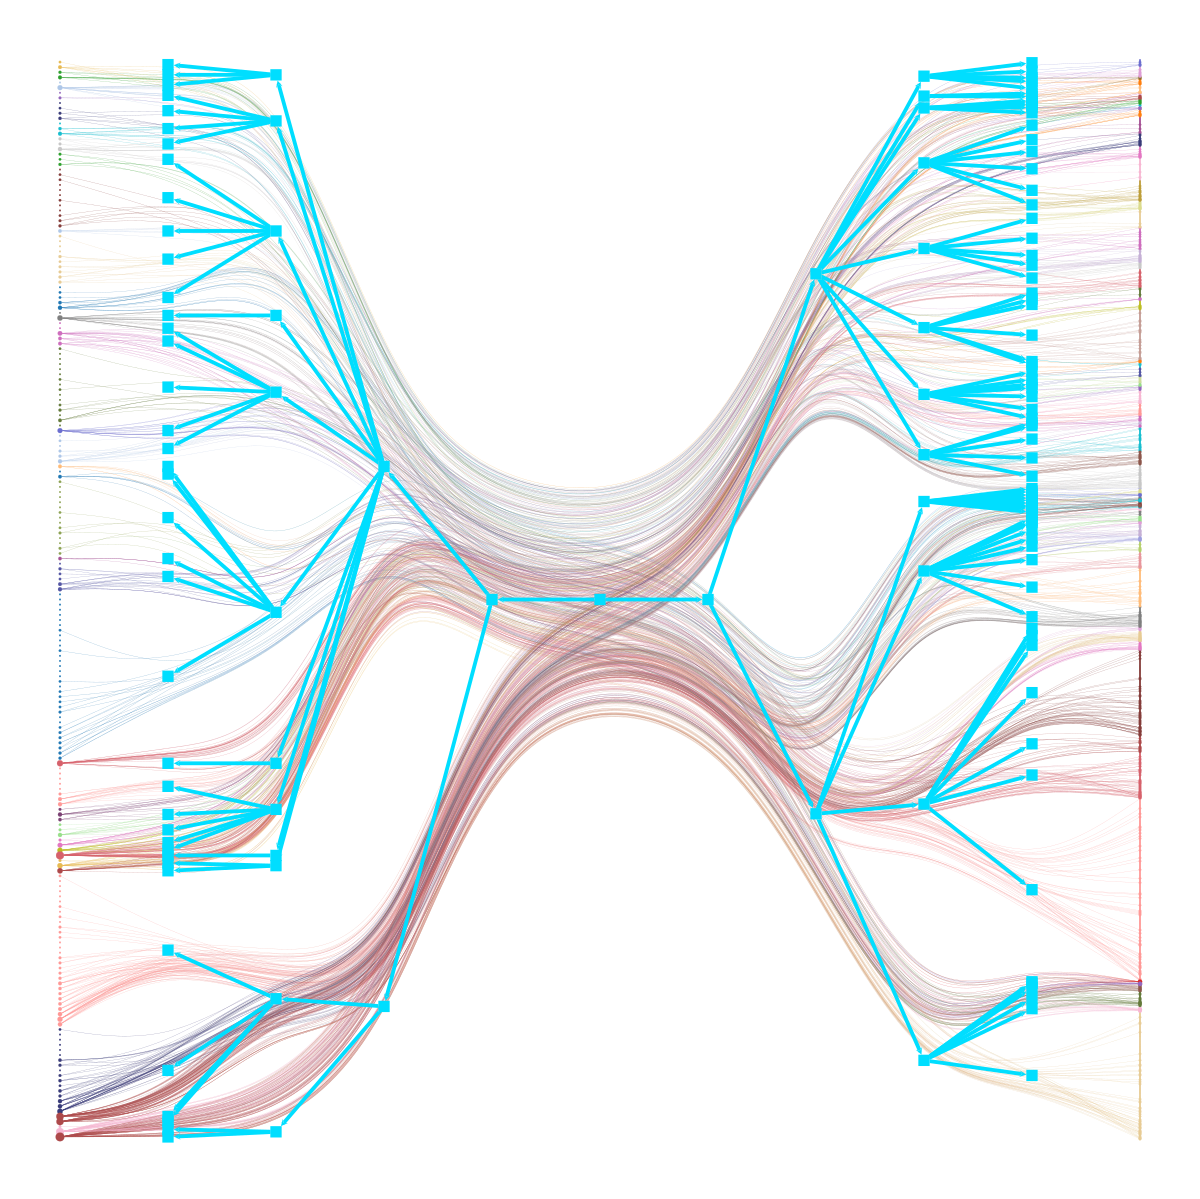

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f00b62bea20, at 0x7f00b62bf3e0>,
 <GraphView object, directed, with 1357 vertices and 1356 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7f0060cbd9d0, at 0x7f0060cd97f0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7f0060cbd9d0, at 0x7f0060cdba40>, False), at 0x7f0060cbd9d0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0060cbd9d0, at 0x7f010c30a8d0>)

In [13]:
import os

## Create the sbmtm model
model = sbmtm()

## we have to create the customer-MCC network from the data
model.make_graph(MCC,documents=CustomerID,counts=True)
SEED = 32
gt.seed_rng(SEED) ## seed for graph-tool's random number generator --> same results

#fit the model
model.fit()

print('The lowest entropy was {}, and the state has {} blocks at level 0'.format(model.state.entropy(),model.state.get_levels()[0].get_nonempty_B()))
# Create the directory if it does not exist
output_dir = './Results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the model
with open(os.path.join(output_dir, 'minimized_model_seed_{}.pkl'.format(SEED)), 'wb') as f:
    pickle.dump(model, f)
Customer_clusters=model.clusters()
print(Customer_clusters)
#Plot
model.state.draw(subsample_edges=1000,layout='bipartite',bip_aspect=1,
           hvertex_size=8, hedge_pen_width=1.9, hedge_color="#00deff", hvertex_fill_color="#00DEFF", output_size=(600, 600))

### Model Analysis

In [10]:
def calculate_CO2_to_amount_ratio(customer_cluster, df):
    # Filter the DataFrame to include only customers in the current cluster
    cluster_data = df[df['customerId'].isin(customer_cluster)]
    
    # Sum up the total CO2 emissions and total amount spent for the cluster
    total_CO2 = cluster_data['Total_CO2_Emissions'].sum()
    total_amount_spent = cluster_data['Total_Amount_Spent'].sum()
    
    # Calculate the ratio of CO2 emissions to the amount spent
    if total_amount_spent != 0:
        ratio = total_CO2 / total_amount_spent
    else:
        ratio = 0.0
    
    return ratio

Length = []
ClusterCO2_ratio = []

for i, cluster in enumerate(Customer_clusters):
    # Calculate the CO2 to amount spent ratio for the current cluster
    ratio = calculate_CO2_to_amount_ratio(cluster, df)
    
    # Append cluster length and CO2 to amount spent ratio to lists
    Length.append(len(cluster))
    ClusterCO2_ratio.append(ratio)
    
    # Print the results
    print(f"The customer cluster {i+1} has {Length[i]} customers and the CO2 emissions to amount spent ratio for it is {ClusterCO2_ratio[i]}")

# Calculate average age for each cluster
ClusterAvgAge = [calculate_average_age_and_IMD(i, customer_data_cleaned, Customer_clusters)[0] for i in range(len(Customer_clusters))]

# Scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
plt.scatter(ClusterAvgAge, ClusterCO2_ratio, color='blue', marker='o')

# Annotate each point with the cluster number
for i, (age, ratio) in enumerate(zip(ClusterAvgAge, ClusterCO2_ratio)):
    plt.text(age, ratio, f'Cluster {i+1}', fontsize=9, ha='center', va='top')

plt.title('Scatter Plot of Average Age vs. CO2 Emissions to Amount Spent Ratio')
plt.xlabel('Average Age of Customers in Cluster')
plt.ylabel('CO2 Emissions to Amount Spent Ratio')
plt.grid(True)
plt.show()

# Calculate average IMD_Rank for each cluster
ClusterAvgIMD = [calculate_average_age_and_IMD(i, customer_data_cleaned, Customer_clusters)[1] for i in range(len(Customer_clusters))]

# Scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
plt.scatter(ClusterAvgIMD, ClusterCO2_ratio, color='blue', marker='o')

# Annotate each point with the cluster number
for i, (imd, ratio) in enumerate(zip(ClusterAvgIMD, ClusterCO2_ratio)):
    plt.text(imd, ratio, f'Cluster {i+1}', fontsize=9, ha='center', va='top')

plt.title('Scatter Plot of Average IMD Rank vs. CO2 Emissions to Amount Spent Ratio')
plt.xlabel('Average IMD Rank of Customers in Cluster')
plt.ylabel('CO2 Emissions to Amount Spent Ratio')
plt.grid(True)
plt.show()

TypeError: only list-like objects are allowed to be passed to isin(), you passed a `int`

#### IMD and Age by clusters

In [ ]:
def calculate_average_age_and_IMD(cluster_index, df, clusters):
    # Get the customer IDs in the specified cluster
    customer_cluster = clusters[cluster_index]

    # Filter the DataFrame to include only customers in the current cluster
    cluster_data = df[df['customerId'].isin(customer_cluster)]
    
    # Calculate the average age and IMD_Rank for the cluster
    average_age = cluster_data['Age'].mean()
    average_IMD = cluster_data['IMD_Rank'].mean()
    
    return average_age, average_IMD
customer_data_cleaned = df
# Example usage:
for index in range(0,9):
    cluster_index = index  # Replace this with the desired cluster index
    avg_age, avg_IMD = calculate_average_age_and_IMD(cluster_index, customer_data_cleaned, Customer_clusters)
    print(f"For cluster {cluster_index + 1}, the average age is {avg_age:.2f} and the average IMD_Rank is {avg_IMD:.2f}")


#### Heatmaps of Purchases by Cluster

In [16]:
df = filtered_data
def mcc_heatmap_normalized(clusters, df):
    cluster_counts = []

    # Get the normalized MCC transaction counts for each cluster
    for i, cluster in enumerate(clusters):
        # Filter the DataFrame based on the customer IDs in the cluster
        filtered_df = df[df['customerId'].isin(cluster)]
        mcc_counts_normalized = filtered_df['MCC_List'].value_counts(normalize=True).rename(f'Cluster {i + 1}')
        cluster_counts.append(mcc_counts_normalized)

    # Combine the normalized counts into a single DataFrame
    mcc_df_normalized = pd.concat(cluster_counts, axis=1, sort=True).fillna(0)

    # Get the top 10 categories with the highest average transaction percentages
    top_categories_normalized = mcc_df_normalized.sum(axis=1).nlargest(15).index

    # Filter the DataFrame to keep only the top categories
    mcc_top_df_normalized = mcc_df_normalized.loc[top_categories_normalized]

    # Create a heatmap
    plt.figure(figsize=(18, 10))
    sns.heatmap(mcc_top_df_normalized, cmap='Reds', annot=True, fmt='.2%', linewidths=.5)
    plt.title('Normalized MCC Categories Heatmap')
    plt.show()

mcc_heatmap_normalized(Customer_clusters[0:38], df)


KeyError: slice(0, 38, None)